1. Problem statement.

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [2]:
# Importing library
import numpy as np 
import pandas as pd


In [3]:
# importing Data
train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

In [4]:
# Shape of the data set
train_data.shape

(8523, 12)

In [5]:
# Checking for data structure
train_data.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Trying to get the description of data
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04768eed30>,
      dtype=object)

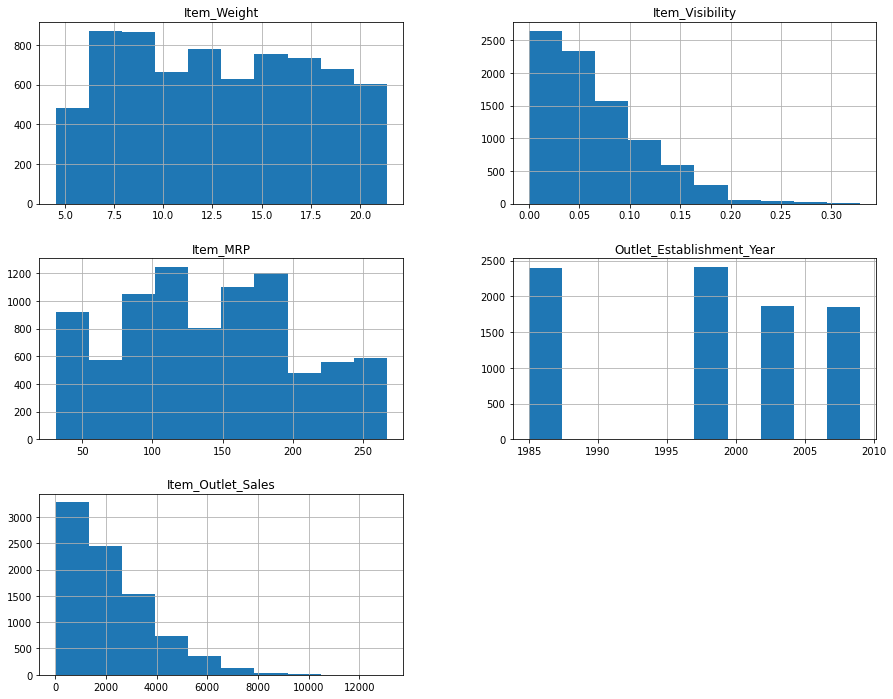

In [7]:
# ploting histogram 
train_data.hist(figsize=(15,12))

# Check for Unique value

In [8]:
print(train_data['Item_Fat_Content'].unique())
print(train_data['Item_Type'].unique())
print(train_data['Outlet_Establishment_Year'].sort_values().unique())
#print(train_data['Outlet_Size'].unique())
print(train_data['Outlet_Location_Type'].unique())
print(train_data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [9]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('reg', 'Regular')

# Check for Outliers

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

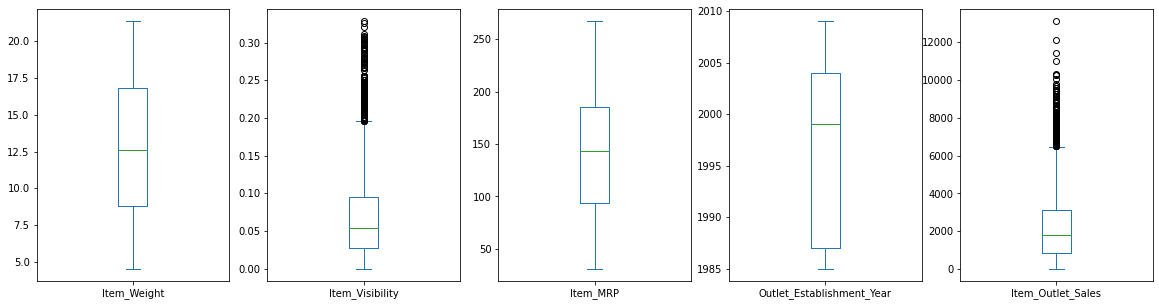

In [10]:
# Checking for outliers value by using box plot
train_data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In ITEM OUTLET SALES the outliers can remain there as in some season the sales jump abruptly.

In [11]:
# Removing Outliers
train_data['Item_Visibility']=train_data[train_data['Item_Visibility']<0.18]['Item_Visibility']

# Checking for NULL values

In [12]:
# checking for the null value using isna function
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               228
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# Checking percentage of NULL values
print("Item Weight NULL value percentage", 1463/8523)
print("Outlet Size NULL value percentage", 2410/8523)
print("Item Visiblity NULL value percentage", 228/8523)

Item Weight NULL value percentage 0.1716531737651062
Outlet Size NULL value percentage 0.2827642848762173
Item Visiblity NULL value percentage 0.026751143963393172


As there are more than 5% NULL values, so we cannot delete those rows and needs to impute them.

ITEM WEIGHT is a numeric column, so it needs to be imputed with MEAN or MEDIAN or MODE. (MODE is considered more usefull during imputing)

OUTLET SIZE is a categorical column, so it need to be imputed with MODE.

ITEM VISIBLITY is having 2% NULL values, ideally we can drop those, but here we are imputing that as well.

In [14]:
print(train_data['Item_Weight'].mode())
print(train_data['Outlet_Size'].mode())
print(train_data['Item_Visibility'].mean())

0    12.15
dtype: float64
0    Medium
dtype: object
0.06181292964400241


In [15]:
# Imputing the columns
train_data['Item_Weight']=train_data['Item_Weight'].fillna(12.15)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data['Item_Visibility']=train_data['Item_Visibility'].fillna(0.06181292964400241)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0475ffd370>,
      dtype=object)

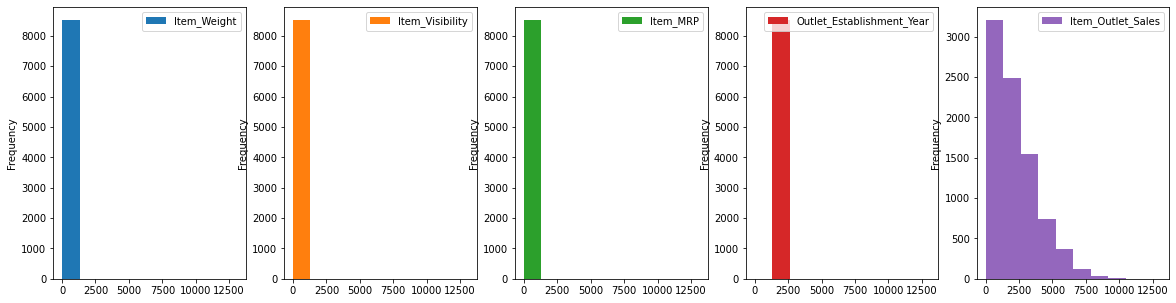

In [17]:
train_data.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

ITEM VISIBLITY, ITEM MRP and OUTLET ESTABLISHMENT YEAR are having similar data in the dataset. While ITEM OUTLET SALES is hvaing some very high values like 10000, which can happen. As during some festival seasons the sales can increase exponentially. So, we won't drop those high values nor would impute them.

# Bivariate Analysis

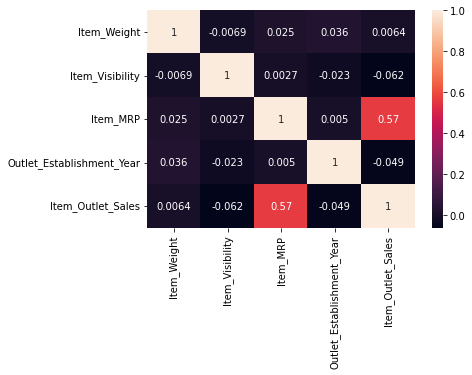

In [18]:
import seaborn as sns
df=train_data.corr()
sns.heatmap(df, annot=True)

# Categorical Variables

In [39]:
train_data.Item_Fat_Content.value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


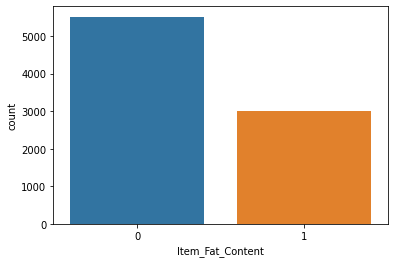

In [40]:
sns.countplot(train_data.Item_Fat_Content)

We can see that none of the Input features is having high correlation factor (> 0.6) with the Output features.

In [42]:
train_data
#train_data.Item_Type.value_counts()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Baking Goods,Breads,...,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,1,2,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,2,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,0,...,0,0,0,1,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,0,0,...,0,0,1,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# sns.barplot(x=train_data['Item_Identifier'], y=train_data['Item_Outlet_Sales'])
# train_data['Item_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

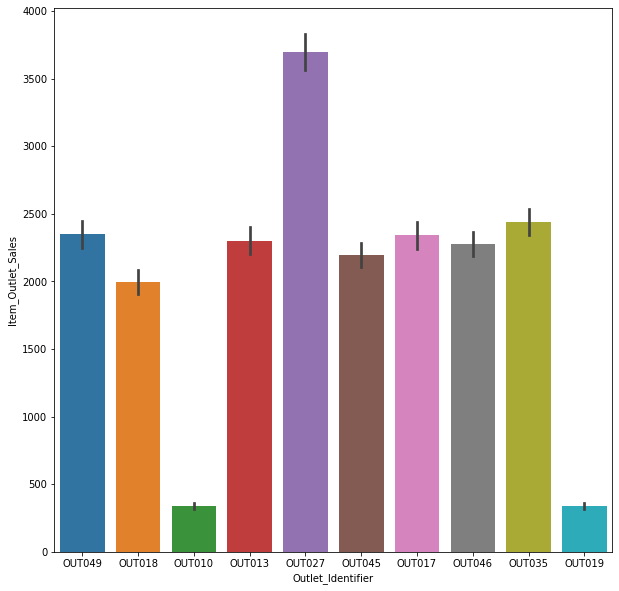

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=train_data['Outlet_Identifier'], y=train_data['Item_Outlet_Sales'])
train_data['Outlet_Identifier'].value_counts()

So, we can consider OUTLET IDENTIFIER for Model creation as there are very limited types and for some Outlets the sale is comparitively high

# Removing useless columns

In [21]:
train_data=train_data.drop('Item_Identifier', axis=1)

# Multivariate Analysis

In [22]:
# sns.pairplot(train_data)

# Encoding

Lable Encoder : Item_Fat_Content, Outlet_Size, Outlet_Location_Type

One-hot Encoder : Item_Type, Outlet_Identifier, Outlet_Type

In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data['Item_Fat_Content']=label.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size']=label.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=label.fit_transform(train_data['Outlet_Location_Type'])

In [24]:
df=pd.get_dummies(train_data['Item_Type'])
train_data=pd.concat([train_data, df], axis=1)

df=pd.get_dummies(train_data['Outlet_Identifier'])
train_data=pd.concat([train_data, df], axis=1)

df=pd.get_dummies(train_data['Outlet_Type'])
train_data=pd.concat([train_data, df], axis=1)

In [25]:
train_data=train_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Baking Goods               8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

# Input and Output Feature Split

In [27]:
x_orig = train_data.drop('Item_Outlet_Sales', axis=1)
y_orig = pd.DataFrame(train_data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])

In [41]:
y_orig.shape

(8523, 1)

#  Modeling 
Linear Regression

In [28]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5445660726900547
RMSE: 1186.9162800139375


# Lasso Regularization

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Lasso
model = Lasso(max_iter=10e5)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE is coming greater than 1, which is more than the expected range of 0 to 1 when the data is standard scaled.

R2 score -0.00024579770948407464
RMSE: 1758.9794452421588


# Ridge Regularization

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Ridge
model = Ridge(max_iter=10e5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

np.sum(model.coef_ != 0)

R2 score 0.5445834929858073
RMSE: 1186.8935800907288


37

# Random Forest

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

<ipython-input-50-b9f462c32af5>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


R2 score 0.5504135079570431
RMSE: 1179.2721001203008


XGBOOST

In [38]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[14:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.6176559922748012
RMSE: 1057.6047886201386
